# 1

In [1]:
import numpy as np
import cvxpy as cp
from data.ls_perm_meas_data import m, k, n, A, y, x_true, P
K_P = P
del P
x_true = np.reshape(x_true, n)
y = np.reshape(y, m)
np.set_printoptions(suppress=True)

def get_error(y, y_hat):
    return np.sum((y - y_hat)**2)

before = []
after = []

bad_indexes = set()
max_iter = 10
for iteration in range(max_iter):
    mask = np.array([i not in bad_indexes for i in range(m)])
    x = cp.Variable(n)
    y_hat = A @ x
    error = (y_hat - y)**2
    obj = cp.Minimize(cp.sum(error[mask]))
    problem = cp.Problem(obj, [])
    problem.solve()
    #x is uniform the first time!
    if iteration == 0:
        x_unif = x.value
    bad_indexes = np.argsort(-error.value)[:k]
    bad_indexes_set = set(bad_indexes)

y_hat_bad_indexs_sorted_index = np.argsort(y_hat.value[bad_indexes])
y_true_bad_indexs_sorted_index = np.argsort(y[bad_indexes])
permuation = np.arange(m)
for i in range(k):
    permuation[bad_indexes[y_true_bad_indexs_sorted_index[i]]] = bad_indexes[y_hat_bad_indexs_sorted_index[i]]

P = np.zeros((m, m))
P[np.arange(m), permuation] = 1

x = cp.Variable(n)
y_hat = A @ x
error = (P @ y_hat - y)**2
obj = cp.Minimize(cp.sum(error))
problem = cp.Problem(obj, [])
problem.solve()

x_smart = x.value

print(f"||x_unif - x_true||_2 = {np.linalg.norm(x_unif - x_true)}")
print(f"||x_smart - x_true||_2 = {np.linalg.norm(x_smart - x_true)}")
print(f"our estimate of permutated indexes = {sorted(bad_indexes)}")
real_bad = [i for i in range(m) if abs(P[i,i] - 1) > 1/10]
print(f"real permutated indexes = {real_bad}")
correct_count = len(set(real_bad).intersection(bad_indexes_set))
print(f"got {correct_count}/{k} correct")


||x_unif - x_true||_2 = 2.2683660401079084
||x_smart - x_true||_2 = 0.08649825909363662
our estimate of permutated indexes = [0, 2, 4, 8, 10, 11, 14, 17, 23, 26, 29, 31, 32, 33, 36, 40, 48, 51, 52, 54, 55, 57, 58, 59, 62, 64, 68, 70, 73, 75, 76, 79, 80, 81, 83, 88, 94, 95, 96, 97]
real permutated indexes = [0, 2, 4, 8, 10, 11, 14, 17, 23, 26, 29, 31, 32, 33, 36, 40, 48, 51, 52, 54, 55, 57, 58, 59, 62, 64, 68, 70, 73, 75, 76, 79, 80, 81, 83, 88, 94, 95, 96, 97]
got 40/40 correct


# 2

In [2]:
import numpy as np
import cvxpy as cp
np.set_printoptions(precision=4, suppress=True)

n = 3
G = np.array([
    [0.3, -0.1, -0.9],
    [-0.6, 0.3, -0.3],
    [-0.3, 0.6, 0.2],
    ])

K = cp.Variable((n, n))
Z = cp.Variable((n, n))
constraints = [
        np.identity(n) + G @ Z == K,
        cp.norm(Z, axis=1) <= 1,
        ]
obj = cp.Minimize(cp.max(cp.norm(K, axis=1)))
problem = cp.Problem(obj, constraints)
problem.solve()
print("Optimal value: ", problem.value)
F = Z.value.dot(np.linalg.inv(K.value))
print(f"F: {F}")


Optimal value:  0.405871932807939
F: [[-1.303   3.6876  3.4561]
 [ 0.2112 -0.8965 -3.3609]
 [15.5272  7.3234 -9.1528]]


# 3

starting experiment general
problem.value: 213.26200390364056
optimal f: [0.1865 0.0489 0.0455 0.0419 0.0381 0.0343 0.0305 0.0268 0.0234 0.0136
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.0186 0.0311 0.0344 0.038  0.0417 0.0455 0.0493 0.053  0.0566 0.0599
 0.0628 0.0653 0.0674 0.0689 0.0699 0.0703 0.0702 0.0694 0.0681 0.0662
 0.0639 0.0611 0.0579 0.0545 0.0508 0.047  0.0333 0.     0.     0.
 0.    ]
optimal speeds: [47.5745 47.5748 47.5748 47.5748 47.5748 47.5748 47.5749 47.5748 47.5746
 46.7166 46.7146 47.0173 47.4987 48.0518 48.5892 49.0409 49.3524 49.4814
 49.3961 49.0728 47.5754 47.5749 47.5749 47.575  47.5748 47.5749 47.575
 47.5749 47.5748 47.5748 47.5748 47.5748 47.5748 47.5748 47.5748 47.5748
 47.5748 47.5748 47.5748 47.5748 47.5748 47.5748 47.5748 47.5748 47.5748
 47.5748 46.2894 41.0762 36.9221 33.8029 31.6519]


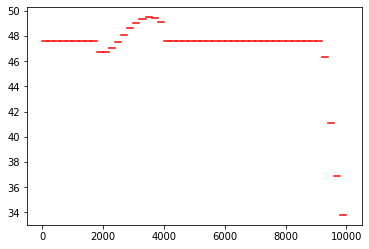

starting experiment uniform
problem.value: 258.47859278891224
optimal f: [0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384
 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384
 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384
 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384
 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384 0.0384
 0.0384]
optimal speeds: [21.5796 26.1383 30.0029 33.4585 36.6387 39.6093 42.4011 45.0253 47.4815
 49.763  53.7161 56.9602 59.6418 61.8537 63.6573 65.0945 66.1953 66.982
 67.4723 67.6812 65.2628 62.9584 60.7059 58.4563 56.1728 53.8296 51.4112
 48.9112 46.332  43.6847 40.9892 38.275  35.5826 32.9652 30.4915 28.2472
 26.335  24.8681 23.9547 23.6721 24.0419 25.0214 26.5175 28.4133 30.5922
 32.9501 35.4    37.8706 40.3043 42.654  44.8811]


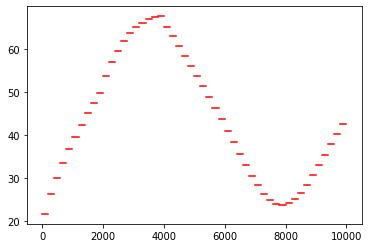

In [19]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from data.min_time_speed_data import N, m, d, h, eta, C_D, P, F, g
np.set_printoptions(precision=4, suppress=True)

experiment_names = ['general', 'uniform']
for name in experiment_names:
    print(f"starting experiment {name}")
    l = cp.Variable(N + 1)
    T = cp.sum(d * cp.inv_pos(cp.sqrt(l))[:-1])
    f = cp.Variable(N + 1)
    constraints = [
            m * l[1:] / 2 + m * g * h[1:] == m * l[:-1]/2 + m * g * h[:-1] + eta * f[1:] - d * C_D * l[:-1],
            eta * f[0] == m * l[0] / 2,
            T * P / eta + cp.sum(f) <= F,
            f >= 0
            ]
    if name == 'uniform':
        constraints.append(f[1:] == f[:-1])

    obj = cp.Minimize(T)
    problem = cp.Problem(obj, constraints)
    problem.solve()
    print(f"problem.value: {problem.value}")
    print(f"optimal f: {f.value}")
    s = np.sqrt(l.value)
    print(f"optimal speeds: {s}")
    for i in range(N):
        distance = [i * d, (i + 1) * d]
        speed = [s[i]] * 2 
        plt.plot(distance, speed, color='red')
    plt.show()


# 4

In [5]:
import numpy as np
import cvxpy as cp

np.set_printoptions(precision=8, suppress=True)

pi = np.array([1/3, 1/6, 1/3, 1/6])
R = np.array([
    [2, 2, 0.5, 0.5],
    [1.3, 0.5, 1.3, 0.5],
    [1, 1, 1, 1]
    ])
n = 3
x = cp.Variable(n)
constraints = [cp.sum(x) == 1]
obj = cp.Maximize(pi @ cp.log(R.T @ x))
problem = cp.Problem(obj, constraints)
problem.solve()
print(f"optimal x: {x.value}")
print(f"optimal value: {problem.value:.8f}")
other_strategies = [
        [1, 0, 0],
        [0, 1, 0],
        [1/2, 1/2, 0],
        ]
for st in other_strategies:
    print(f"Strategy : {st}")
    x.value = np.array(st)
    print(f"Strategy value: {obj.value:.8f}")


optimal x: [0.49725066 0.19936696 0.30338238]
optimal value: 0.06227158
Strategy : [1, 0, 0]
Strategy value: 0.00000000
Strategy : [0, 1, 0]
Strategy value: -0.05613955
Strategy : [0.5, 0.5, 0]
Strategy value: 0.05347099


# 5

value:  40.74950296992082
optimal x: [ 0.     18.9326  0.      0.     13.8493  8.9228]
optimal B0: 0.0000
Optimal: 
initial money required:  40.74950294681729


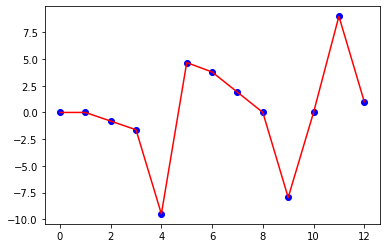

no bonds: 
initial money required:  41.7902433599184


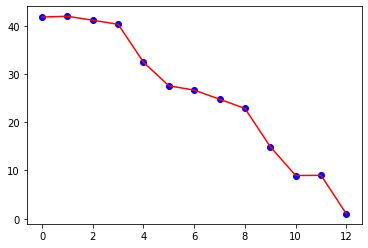

In [8]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from data.opt_funding_data import n, T, rp, rn, E, C, P, M, A
np.set_printoptions(precision=4, suppress=True)

B = cp.Variable(T + 1)
I = cp.Variable(T + 1)
x = cp.Variable(n)
E = np.hstack([0, E])

constraints = [
        B[-1] + I[-1] - E[-1] == 0,
        B[:-1] >= B[1:] * (1/(1 + rn)) + cp.pos(B[1:]) * (1/(1 + rp) - 1/(1 + rn)) - I[:-1] + E[:-1],
        B[0] >= 0,
        I[0] == 0,
        I[1:] == A @ x,
        x >= 0,
        ]

obj = cp.Minimize(x @ P + B[0])
problem = cp.Problem(obj, constraints)
problem.solve()
print("value: ", problem.value)
print(f"optimal x: {x.value}")
print(f"optimal B0: {B[0].value:.4f}")

def plot_balance(x_val):
    B = cp.Variable(T + 1)
    I = cp.Variable(T + 1)
    x = cp.Variable(n)
    constraints = [
            B[-1] + I[-1] - E[-1] == 0,
            B[:-1] >= B[1:] * (1/(1 + rn)) + cp.pos(B[1:]) * (1/(1 + rp) - 1/(1 + rn)) - I[:-1] + E[:-1],
            B[0] >= 0,
            I[0] == 0,
            I[1:] == A @ x,
            x == x_val,
            ]

    obj = cp.Minimize(x @ P + B[0])
    problem = cp.Problem(obj, constraints)
    problem.solve()
    print("initial money required: ", problem.value)
    plt.scatter(np.arange(T + 1), B.value, color='blue')
    plt.plot(np.arange(T + 1), B.value, color='red')
    plt.show()

print("Optimal: ")
plot_balance(x.value)
print("no bonds: ")
plot_balance(np.zeros(n))
